In [10]:
import matplotlib.pyplot as plt
from project import SolverLP
%matplotlib inline

In [19]:
graph = dict()
reverse_graph = dict()
f = open('Butterfly.in', 'r')
nodes = int(f.readline())
edges = int(f.readline())
edge = []
e = []
for i in range(edges):
    inp = f.readline().split()
    u, v, d, r = int(inp[0]), int(inp[1]), float(inp[2]), float(inp[3])
    edge.append((u, v, d, r))
    e.append((u, v))
    if u in graph:
        graph[u].append((v, d, r, i))
    else:
        graph[u] = [(v, d, r, i)]
    if v in reverse_graph:
        reverse_graph[v].append((u, d, r, i))
    else:
        reverse_graph[v] = [(u, d, r, i)]

source = []
for i in range(int(f.readline())):
    source.append(int(f.readline()))

destination = []
for i in range(int(f.readline())):
    destination.append(int(f.readline()))

s_to_d = []
for i in range(int(f.readline())):
    (s, d) = [int(x) for x in f.readline().split()]
    s_to_d.append((s, d))

lim_s = dict()
for i in range(int(f.readline())):
    inp = f.readline().split()
    lim_s[int(inp[0])] = float(inp[1])

lim_R = dict()
for i in range(int(f.readline())):
    inp = f.readline().split()
    lim_R[int(inp[0])] = float(inp[1])

solv = SolverLP(nodes, edge, source, destination, graph, reverse_graph, s_to_d, lim_s, lim_R)
solv.Solve()

[0.04478619654913727,
 0.04478619654913727,
 0.0,
 0.0,
 6.938893903907228e-18,
 6.938893903907228e-18,
 0.04478619654913728,
 0.04478619654913728,
 0.0,
 0.0,
 0.04478619654913727,
 0.044786196549137264,
 0.04478619654913727,
 0.04478619654913727,
 0.0,
 6.938893903907228e-18]

In [20]:
import networkx as nx

In [21]:
G = nx.DiGraph()

In [22]:
G.add_nodes_from(range(nodes))
w = solv.edgesWeight()
for i in range(len(e)):
    G.add_edge(e[i][0], e[i][1], color='b', weight=w[i]*100)
colors = [G[u][v]['color'] for u, v in G.edges]
weights = [G[u][v]['weight'] for u,v in G.edges]
pos = dict() # nx.random_layout(G)
c = 0
for i in range(3):
    for j in range(4):
        pos[c] = [i, j]
        c+=1

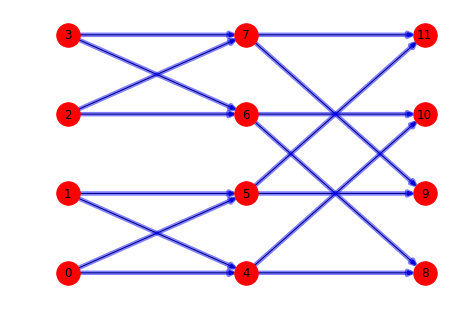

In [23]:
nx.draw(G, pos, with_labels=True, node_size=550)
nx.draw_networkx_edges(G, pos, edge_color=colors, alpha=0.5, width=weights)
plt.show()

In [24]:
# print(pos)

In [25]:
solv.Clear()
